#  County-Level Examination of Opioid Mortality in the United States

This code pulls county-level data encompassing median household income from USDA records, opioid prescription rates from the CDC, and opioid mortality rates using the CDC's wonder tool. This data has been collected and placed locally for analysis, and graphical outputs of trends are displayed below 

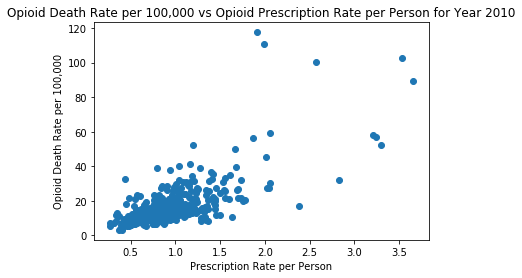

r-squared is: 0.504494041438


In [23]:
#Pull data from:
#https://wonder.cdc.gov/controller/datarequest/D76;jsessionid=E1C9E5C61A4F4F9794D48F66D9B3C34F
#Used reference codes from:
#https://www.cdc.gov/drugoverdose/data/statedeaths.html

#Opioid prescription rates found from https://www.cdc.gov/drugoverdose/maps/rxrate-maps.html


#Import relevant libraries
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


#Laptop Directory
os.chdir(r"C:\Users\Paul\Desktop\Data_Incubator April 2018\Project")

#Desktop Directory
#os.chdir(r"C:\Users\Paul\Desktop\Insight Health Data\Working_Directory")

#Grab median salary data
incomes={}
all_incomes_list = []

#Use county level census data drawn from the following source (4/25/18):
#'Unemployment and median household income for the U.S., States, and counties, 2007-16', last updated 1/25/18
#https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/

#Open census data to grab median incomes for each county in the USA
with open('Unemployment.csv') as file:
    reader = csv.reader(file)
    
    #Skip headers
    for i in range(8):
        next(reader)
        
    #Read in salary data (col 46 w/ Python indexing) and store it in a dictionary using the county code as the key
    for row in reader:
        if(len(row[46].strip())>0):
            identifier = row[0].strip()
        #Check for entries where income information is not available (seems to be an issue with US territories) and disregard them
        if(len(row[46].strip())>0):
            amount = int(row[46].replace(',',''))
            incomes.setdefault(identifier,amount)
            

mean_years = []
#Data on number of opioid prescriptions by county
opioid_rx = ['2007OpioidPrescriptions.csv','2008OpioidPrescriptions.csv','2009OpioidPrescriptions.csv','2010OpioidPrescriptions.csv','2011OpioidPrescriptions.csv','2012OpioidPrescriptions.csv','2013OpioidPrescriptions.csv','2014OpioidPrescriptions.csv','2015OpioidPrescriptions.csv','2016OpioidPrescriptions.csv']

#Data for opioid deaths (IDC-10 codes X40-X44, X60-X64, X85, and Y10-Y14, taken from CDC classifiers for opioid-related deaths)
input_years = ['2007Data.csv','2008Data.csv','2009Data.csv','2010Data.csv','2011Data.csv','2012Data.csv','2013Data.csv','2014Data.csv','2015Data.csv','2016Data.csv']

#f, axes = plt.subplots(2,5)
#ax_i = 0
#ax_j = 0

#Read in each year of data one by one
for index in range(len(input_years)):
    current_year = input_years[index][:4]
    county_population = {}
    opioid_death = {}
    value_catalog = []
    opioid_prescriptions = {}
    with open(input_years[index]) as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            if(len(row[1].strip())>0):
                put_rate = row[6].strip()
                if(str.isdigit(put_rate.replace('.',''))):
                    code = row[2].strip()
                    if(len(code)==4):
                        code = '0'+code
                    opioid_death[code]=float(put_rate)
                    value_catalog.append(float(put_rate))
                    county_population[code]=int(row[4].strip())

    with open(opioid_rx[index]) as file:
        reader = csv.reader(file)
        #Skip header
        next(reader)
        for row in (reader):
            reported_val = row[3].strip()
            if(str.isdigit(reported_val.replace('.',''))):
                rate_per_100 = float(row[3].strip())
                code = row[2].strip()
                if(len(code)==4):
                    code = '0'+code
                opioid_prescriptions[code]=rate_per_100/100

    x_axis_prescrip = []
    y_axis_death = []
    for item in opioid_death:
        if item in opioid_prescriptions:
            x_axis_prescrip.append(opioid_prescriptions[item])
            y_axis_death.append(opioid_death[item])
    if(current_year=='2010'):
        plt.title('Opioid Death Rate per 100,000 vs Opioid Prescription Rate per Person for Year ' + str(current_year))
        plt.xlabel('Prescription Rate per Person')
        plt.ylabel('Opioid Death Rate per 100,000')
        a = np.array(x_axis_prescrip)
        b = np.array(y_axis_death)
        plt.scatter(a,b)
        plt.show()
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(a,b)

        print('r-squared is: ' + str(r_value*r_value))